In [1]:
!pip install pystan

In [2]:
!pip install fbprophet

In [0]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [0]:
df = pd.read_csv('https://github.com/facebook/prophet/raw/master/examples/example_wp_log_peyton_manning.csv')

In [5]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [0]:
df['y'] = np.log(df['y'])

In [7]:
df.head()

,ds,y
0,2007-12-10,2.260800
1,2007-12-11,2.142368
2,2007-12-12,2.102142
3,2007-12-13,2.088459
4,2007-12-14,2.066049


In [0]:
m = Prophet()

In [9]:
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [11]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,2.091071,1.990020,2.179458
3266,2017-01-16,2.128085,2.027923,2.220043
3267,2017-01-17,2.105946,2.005950,2.199738
3268,2017-01-18,2.086632,1.984884,2.189669
3269,2017-01-19,2.087840,1.991794,2.181615


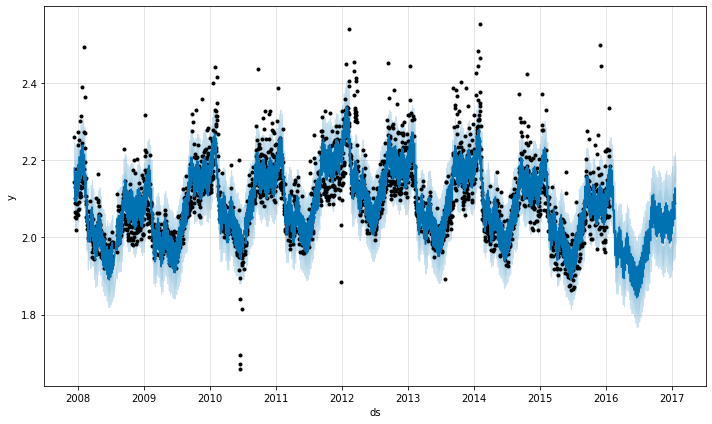

In [12]:
m.plot(forecast).savefig('1.png')

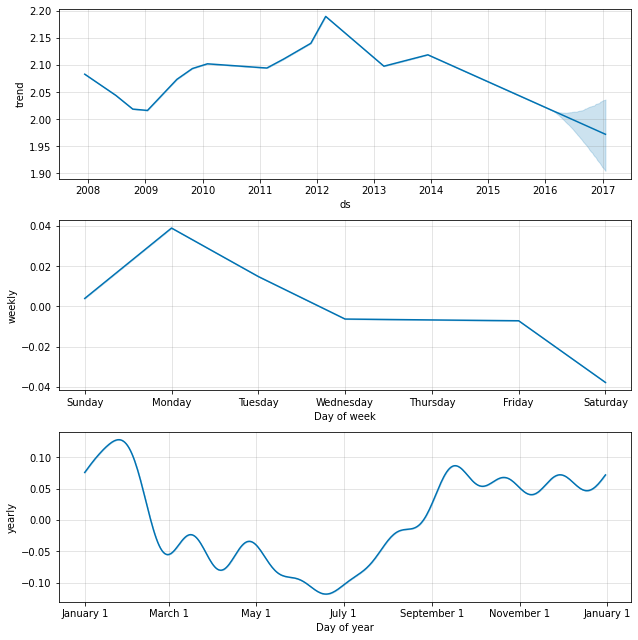

In [13]:
m.plot_components(forecast).savefig('2.png')